In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Coger datos de MNIST

import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_test.shape

(10000, 28, 28)

In [0]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [5]:
x_train.shape

(60000, 784)

In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
# MODELO
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=784))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# FUNCION DE COSTE, OPTIMIZADOR Y METRICA
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['binary_accuracy'])

# ENTRENAMIENTO
model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.1192 - binary_accuracy: 0.8801
Epoch 2/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.1014 - binary_accuracy: 0.8980
Epoch 3/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0916 - binary_accuracy: 0.9079
Epoch 4/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0887 - binary_accuracy: 0.9109
Epoch 5/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0880 - binary_accuracy: 0.9116
Epoch 6/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0879 - binary_accuracy: 0.9117
Epoch 7/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0824 - binary_accuracy: 0.9172
Epoch 8/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0703 - binary_a

In [13]:
# MODELO
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# FUNCION DE COSTE, OPTIMIZADOR Y METRICA
sgd = SGD(lr=0.015, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['binary_accuracy'])

# ENTRENAMIENTO
model.fit(x_train, y_train,
          epochs=22,
          batch_size=128)

Epoch 1/22
60000/60000 [==============================] - 2s 39us/step - loss: 0.0786 - binary_accuracy: 0.9173
Epoch 2/22
60000/60000 [==============================] - 2s 35us/step - loss: 0.0383 - binary_accuracy: 0.9577
Epoch 3/22
60000/60000 [==============================] - 2s 35us/step - loss: 0.0259 - binary_accuracy: 0.9729
Epoch 4/22
60000/60000 [==============================] - 2s 35us/step - loss: 0.0229 - binary_accuracy: 0.9764
Epoch 5/22
60000/60000 [==============================] - 2s 35us/step - loss: 0.0128 - binary_accuracy: 0.9854
Epoch 6/22
60000/60000 [==============================] - 2s 35us/step - loss: 0.0096 - binary_accuracy: 0.9887
Epoch 7/22
60000/60000 [==============================] - 2s 35us/step - loss: 0.0086 - binary_accuracy: 0.9900
Epoch 8/22
60000/60000 [==============================] - 2s 35us/step - loss: 0.0079 - binary_accuracy: 0.9908
Epoch 9/22
60000/60000 [==============================] - 2s 35us/step - loss: 0.0071 - binary_accuracy:

In [14]:
#EVALUACIÓN
score = model.evaluate(x_test, y_test, batch_size=128)

score

10000/10000 [==============================] - 0s 20us/step


[0.0067105336210592555, 0.9921900032043457]

In [12]:
# FUNCIÓN DE EVALUACIÓN
y_hat = model.predict(x_test)
CH = tf.math.reduce_mean(keras.losses.mean_squared_error(y_hat, y_test))
sess = tf.Session()
print(sess.run(CH))

0.051237926


In [13]:
# FUNCIÓN DE EVALUACIÓN 2
import numpy as np
np.mean(np.abs(y_hat-y_test)**2)

0.051237855

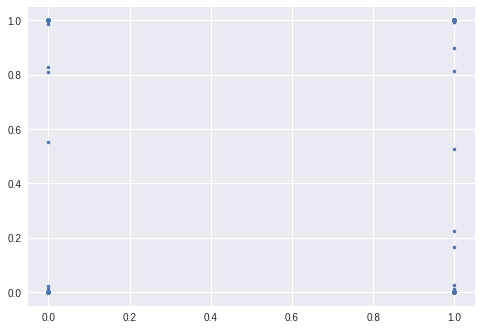

In [0]:
import matplotlib.pyplot as plt

plt.figure
plt.plot(y_test[:,6],y_hat[:,6],'.')